# 二項分布

## 概要

ベルヌーイ試行を独立に$n$回行ったときの「成功」の回数の分布。最も基本的な離散確率分布の一つであり、品質管理、医学統計、マーケティングなど幅広い分野で利用される。

## 確率質量関数

$$
P(X=k \mid n, p) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k=0,1,\dots,n
$$

パラメータ:

- $n$: 試行回数（自然数）
- $p$: 各試行での成功確率 ($0 \leq p \leq 1$)
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$: 二項係数

### 導出

$i=1,2,\dots,n$に対して確率変数$X_i$を成功のとき1、失敗のとき0をとるものとすると、「成功」の回数は$Y=\sum^n_{i=1}X_i$と表すことができる。

$Y=k$となる確率は以下のようになる。

$$
P(Y=k) = \binom{n}{k} p^k (1 - p)^{n-k}
$$

:::{admonition} 例：$Y=2$となる確率の場合
:class: tip

成功が2回、失敗が$n-2$回とする。

「成功」の事象を$A_i$、「失敗」の事象を$A_i^c$とすると、最初の2回が「成功」となる事象の確率は

$$
P(A_1 \cap A_2 \cap A_3^c \cap \cdots \cap A_n^c)
$$

と表すことができる。

試行の独立性と$P(A_i)=p, P(A_i^c)=1-p$から

$$
\begin{align}
&P(A_1 \cap A_2 \cap A_3^c \cap \cdots \cap A_n^c)\\
&= P(A_1)P(A_2)P(A_3^c)\times\cdots\times P(A_n^c)\\
&= p^2(1-p)^{n-2}
\end{align}
$$

と書くことができる。

$n$回試行して2回成功する事象の組み合わせは$A_1 \cap A_2^c \cap A_3 \cap \cdots \cap A_n^c$や$A_1^c \cap A_2^c \cap A_3 \cap \cdots \cap A_n$など他にも考えられ、その場合の数は組み合わせの数になるため$\binom{n}{2}$となる。

したがって、$Y=2$となる確率は

$$
P(Y=2) = \binom{n}{2} p^2 (1 - p)^{n-2}
$$

となり、この$2$を$k$にすれば上記のものになる。
:::

## 累積分布関数

$$
F(k) = P(X \leq k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1-p)^{n-i}
$$

二項分布の累積分布関数には閉じた形の式は存在しない。正則化不完全ベータ関数を用いて

$$
F(k; n, p) = I_{1-p}(n - k, k + 1)
$$

と表すこともできる。

## 期待値・分散

$$
E[X] = np
$$

$$
V[X] = np(1-p)
$$

### 導出

$X = \sum_{i=1}^n X_i$ （$X_i \sim \text{Bernoulli}(p)$が互いに独立）と表せることを利用する。

ベルヌーイ分布の期待値は$E[X_i] = p$、分散は$V[X_i] = p(1-p)$であるから、期待値の線形性より

$$
E[X] = E\left[\sum_{i=1}^n X_i\right] = \sum_{i=1}^n E[X_i] = np
$$

$X_i$が互いに独立であるため、分散についても

$$
V[X] = V\left[\sum_{i=1}^n X_i\right] = \sum_{i=1}^n V[X_i] = np(1-p)
$$

が成り立つ。

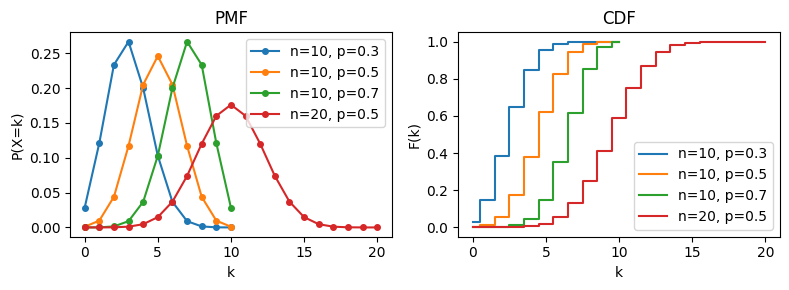

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

fig, axes = plt.subplots(1, 2, figsize=[8, 3])

# PMF
params = [(10, 0.3), (10, 0.5), (10, 0.7), (20, 0.5)]
for n, p in params:
    k = np.arange(0, n + 1)
    pmf = binom.pmf(k, n=n, p=p)
    axes[0].plot(k, pmf, 'o-', markersize=4, label=f"n={n}, p={p}")

axes[0].set(title="PMF", xlabel="k", ylabel="P(X=k)")
axes[0].legend()

# CDF
for n, p in params:
    k = np.arange(0, n + 1)
    cdf = binom.cdf(k, n=n, p=p)
    axes[1].step(k, cdf, where='mid', label=f"n={n}, p={p}")

axes[1].set(title="CDF", xlabel="k", ylabel="F(k)")
axes[1].legend()
fig.tight_layout()


## 性質

- $n=1$のときベルヌーイ分布に一致
- 再生性：$X_1 \sim B(n_1, p), X_2 \sim B(n_2, p)$が独立なら$X_1+X_2 \sim B(n_1+n_2, p)$
- $n$が大きく$p$が小さいとき、ポアソン分布$\text{Poi}(np)$で近似可（ポアソンの小数の法則）
- $np$と$n(1-p)$がともに十分大きいとき、正規分布$N(np, np(1-p))$で近似可（中心極限定理）
- 最頻値は$\lfloor (n+1)p \rfloor$または$\lfloor (n+1)p \rfloor - 1$

## 応用例

- 品質管理における不良品数のモデリング
- 臨床試験における治療成功数
- A/Bテストでのコンバージョン数
- 選挙における得票数の予測

## 参考文献
